In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as scio
import scipy.optimize as opt

In [4]:
data = scio.loadmat("ex5data1.mat")
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

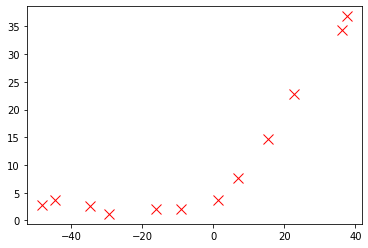

In [5]:
fig = plt.plot(X, y, 'rx', markersize = 10, linewidth = 1.5)

In [6]:
def linearRegCostFunction(Theta, X, y, Lambda):
    m, n = X.shape
    Theta = Theta.reshape(n+1, 1)
    X = np.hstack((np.ones((m, 1)), X))
    s1 = np.dot(X, Theta) - y
    s2 = np.dot(s1.T, s1)
    s3 = np.dot(Theta.T, Theta) - Theta[0, 0] * Theta[0, 0]
    J = 1 / 2 / m * s2 + Lambda / 2 / m * s3
    return J

In [7]:
theta = np.array([1, 1]).reshape(2,1)
linearRegCostFunction(theta, X, y, 1)

array([[303.99319222]])

In [8]:
def linearRegGradient(Theta, X, y, Lambda):
    m, n = X.shape
    Theta = Theta.reshape(n+1, 1)
    X = np.hstack((np.ones((m, 1)), X))
    s1 = np.dot(X, Theta) - y
    s2 = np.dot(X.T, s1)
    s3 = Theta
    s3[0, 0] = 0
    grad = 1 / m * s2 + Lambda / m * s3
    return grad.ravel()

In [9]:
linearRegGradient(theta, X, y, 1)

array([-15.30301567, 598.25074417])

In [10]:
def trainLinearReg(X, y, Lambda):
    n = X.shape[1] + 1
    Theta = np.zeros(n)
    Theta = Theta.ravel()
    Theta = opt.fmin_cg(f = linearRegCostFunction, x0 = Theta, fprime = linearRegGradient, args = (X, y, Lambda), maxiter = 200, disp = False)
    return Theta.reshape(n, 1)

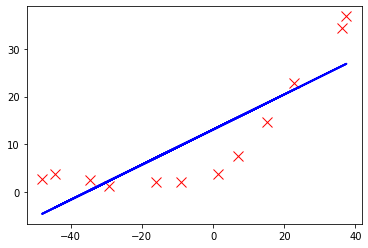

In [11]:
Theta = trainLinearReg(X, y, 0)
plt.plot(X, y, 'rx', markersize = 10, linewidth = 1.5)
m = X.shape[0]
h = np.dot(np.hstack((np.ones((m, 1)), X)), Theta)
plt.plot(X, h, 'b-', linewidth = 2)

In [12]:
def learningCurve(X, y, Xval, yval, Lambda):
    m, n = X.shape
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(m):
        theta = trainLinearReg(X[0 : i + 1, :], y[0 : i + 1, :], Lambda)
        error_train[i] = linearRegCostFunction(theta, X[0 : i + 1, :], y[0 : i + 1, :], 0)
        error_val[i] = linearRegCostFunction(theta, Xval, yval, 0)
    return error_train, error_val

In [13]:
error_train, error_val = learningCurve(X, y, Xval, yval, 0)

(0.0, 13.0, 0.0, 150.0)

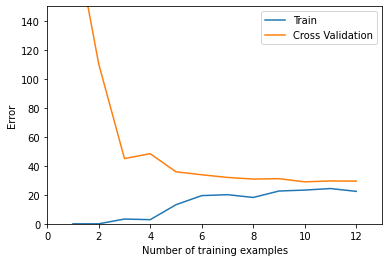

In [14]:
plt.plot(range(1, m + 1), error_train, range(1, m + 1), error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.axis([0, 13, 0, 150])

In [15]:
def polyFeatures(X, p):
    m = X.shape[0]
    X_poly = np.zeros((m, p))
    for i in range(1, p + 1):
        X_poly[:,i-1] = np.power(X, i).reshape(-1)
    return X_poly

In [16]:
X_poly = polyFeatures(X, 8)
X_poly.shape

(12, 8)

In [17]:
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X - mu, axis = 0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [18]:
def plotFit(X, mu, sigma, theta, p):
    x = np.arange(np.amin(X) - 15, np.amax(X) + 25, 0.05)
    m = x.shape[0]
    x_poly = polyFeatures(x, p)
    x_norm = (x_poly - mu) / sigma
    h = np.dot(np.hstack((np.ones((m, 1)),x_norm)), theta)
    plt.plot(x, h, '--', linewidth = 2)
    return

In [37]:
p = 8
X_poly = polyFeatures(X, p)
[X_norm, mu, sigma] = featureNormalize(X_poly)
Lambda = 1
Theta = trainLinearReg(X_norm, y, Lambda)

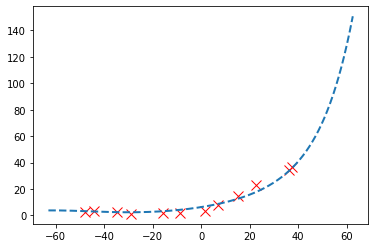

In [38]:
plt.plot(X, y, 'rx', markersize = 10, linewidth = 1.5)
plotFit(X, mu, sigma, Theta, p)

In [39]:
Xval_poly = polyFeatures(Xval, p)
Xval_norm = (Xval_poly - mu) / sigma
Xtest_poly = polyFeatures(Xtest, p)
Xtest_norm = (Xtest_poly - mu) / sigma

In [40]:
error_train, error_val = learningCurve(X_norm, y, Xval_norm, yval, Lambda)

(0.0, 13.0, 0.0, 150.0)

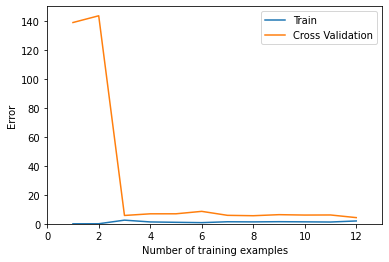

In [41]:
plt.plot(range(1, m + 1), error_train, range(1, m + 1), error_val)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.axis([0, 13, 0, 150])

In [45]:
def validationCurve(X, y, Xval, yval):
    lambda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
    m = lambda_vec.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(m):
        theta = trainLinearReg(X, y, lambda_vec[i])
        error_train[i] = linearRegCostFunction(theta, X, y, 0)
        error_val[i] = linearRegCostFunction(theta, Xval, yval, 0)
    return error_train, error_val, lambda_vec

In [46]:
error_train2, error_val2, lambda_vec= validationCurve(X_norm, y, Xval_norm, yval)

Text(0, 0.5, 'Error')

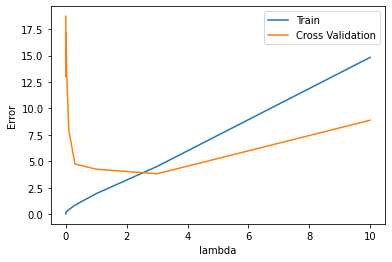

In [49]:
plt.plot(lambda_vec, error_train2, lambda_vec, error_val2)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')

In [54]:
best_lambda = lambda_vec[np.argmin(error_val2)]
theta = trainLinearReg(X_norm, y, best_lambda)
error_test = linearRegCostFunction(theta, Xtest_norm, ytest, 0)
print(error_test)

[[3.57202662]]


In [57]:
def learningRandomCurve(X, y, Xval, yval, Lambda, times):
    m = X.shape[0]
    error_train = np.zeros(m)
    error_val = np.zeros(m)
    for i in range(m):
        train_sum = 0
        val_sum = 0
        for j in range(times):
            ran_indices = np.random.choice(np.arange(m), i + 1)
            theta = trainLinearReg(X[ran_indices, :], y[ran_indices, :], Lambda)
            train_sum += linearRegCostFunction(theta, X[ran_indices, :], y[ran_indices, :], 0)
            val_sum += linearRegCostFunction(theta, Xval, yval, 0)
        error_train[i] = train_sum / times
        error_val[i] = val_sum / times
    return error_train, error_val

In [68]:
error_train3, error_val3 = learningRandomCurve(X_norm, y, Xval_norm, yval, 0.01, 50)

(0.0, 13.0, 0.0, 150.0)

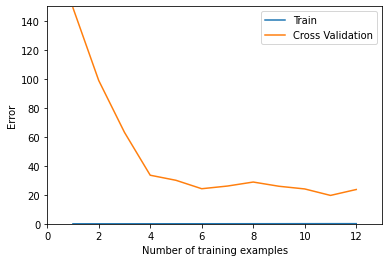

In [69]:
plt.plot(range(1, m + 1), error_train3, range(1, m + 1), error_val3)
plt.legend(['Train', 'Cross Validation'])
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.axis([0, 13, 0, 150])